15.4 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
[1.6249999998763087e-05, 8.556999996471859e-05, 0.000250419999974838, 0.0005494900000030612, 0.0010228799999822513, 0.001717000000007829, 0.002661420000004, 0.003909629999998288, 0.005632900000000518, 0.007533729999977368]


'model = LinearRegression()\n\nmodel.fit(l_dims,l_timings)'

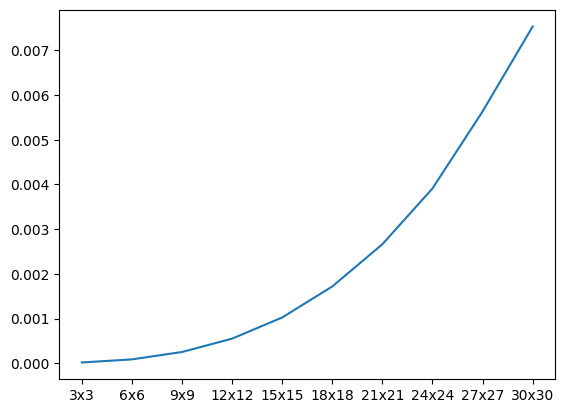

In [2]:

import numpy as np
import random 
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
def multiplicar(a:np.array,b:np.array):
    def multiplicar_listas(l1,l2):
        a_sumar=[]
        for i in range(len(l1)):
            a_sumar.append(l1[i]*l2[i])
        return sum(a_sumar)
    filas_a,columnas_a=np.shape(a)
    filas_b,columnas_b=np.shape(b)
   
    if columnas_a!=columnas_b:
        raise KeyError('las matrices no se pueden multiplicar')
    l=[]
    for x in range(filas_a):
        l.append([])
    for i in range(filas_a):  #por cada fila de a hay una columna de b SIEMPRE,sino no podríamos multiplicar las matrices
        for e in range(columnas_b):
            l[i].append(multiplicar_listas(a[i],b[:,e]))
    return np.array(l)
            
a=np.array([[2,3,2],[1,0,5],[4,2,1]])
b=np.array([[2,4,0],[2,3,0],[1,3,5]])

%timeit multiplicar(a,b)



l_dims = []
l_timings = []
for i in range(1,11):
    dim = 3*i
    #m debe contener una matriz aleatoria dim x dim
    m = np.random.uniform(0,1,(dim,dim))
    timings = %timeit -o -n 10 -r 5 -q multiplicar(m, m)
    l_timings.append(timings.best)
    
print(l_timings)#a continuación voy a crear una lista con las dimensiones de las distintas matrices 
#que se construyen para luego poder hacer una gráfica 
l_dims=[]
for i in range(1,11):
    l_dims.append(f'{3*i}x{3*i}')  #para que nos quede una gráfica que en todas las ejecuciones sea semejante,
    #lo que hacemos es aumentar la dimensión de las matrices de 3 en 3
    
print(plt.plot(l_dims,l_timings))

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()


1677878056.6803572
[0.0, 0.0, 0.0, 0.0009968280792236328, 0.000997304916381836, 0.0019953250885009766, 0.0029909610748291016, 0.0039899349212646484, 0.00598454475402832, 0.0070116519927978516]


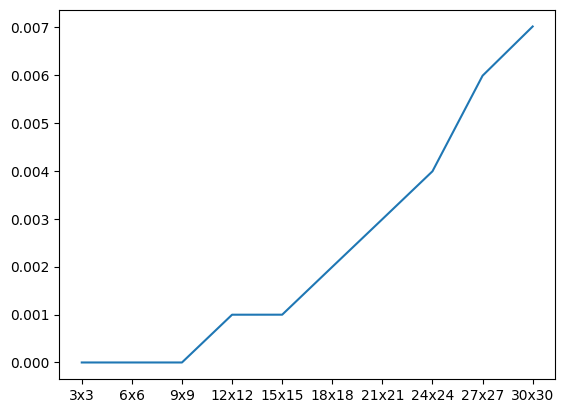

In [3]:
# midiendo tiempos tercer apartado

import time as tm
print(tm.time())
l_dims = []
l_timings = []
for i in range(1,11):
    dim = 3*i
    #m debe contener una matriz aleatoria dim x dim
    m = np.random.uniform(0,1,(dim,dim))
    #timings = %timeit -o -n 10 -r 5 -q multiplicar(m, m)
    
    inicio=tm.time()
    multiplicar(m, m)
    tiempo_ejecucion=tm.time()-inicio
    l_timings.append(tiempo_ejecucion)
    
print(l_timings)#a continuación voy a crear una lista con las dimensiones de las distintas matrices 
#que se construyen para luego poder hacer una gráfica 
l_dims=[]
for i in range(1,11):
    l_dims.append(f'{3*i}x{3*i}')  #para que nos quede una gráfica que en todas las ejecuciones sea semejante,
    #lo que hacemos es aumentar la dimensión de las matrices de 3 en 3
    
print(plt.plot(l_dims,l_timings))


In [24]:
#3-A: Movimientos en Hanoi
movimientos = 0
def hanoi_moves(n, t1="t1", t2="t2", t3="t3"):

    global movimientos
    if n == 1:
        movimientos += 1
    else:
        hanoi_moves(n - 1, t1, t3, t2)
        movimientos +=1
        hanoi_moves(n - 1, t2, t1, t3)


hanoi_moves(4)
print (movimientos)


"""
Cuestiones: 
1)Funcion (n^2)-1

"""

15


'\nCuestiones: \n1)Funcion (n^2)-1\n\n'

[1.90013088285923e-07, 2.00001522898674e-07, 8.200062438845635e-07, 1.659989356994629e-06, 2.269982360303402e-06, 3.450014628469944e-06, 7.519987411797046e-06, 1.1480017565190793e-05, 2.3070001043379305e-05, 3.632998559623957e-05, 9.514999110251665e-05, 9.113999549299478e-05, 0.00015781000256538392, 0.00020125000737607478, 0.0003423300106078386, 0.0005120800109580159, 0.0003433600068092346, 0.0005309399915859103, 0.0008267700206488371, 0.001800610008649528, 0.003893529996275902, 0.004193699988536537, 0.006508369999937713, 0.01057994000148028, 0.016792119992896915]


'timings_iterativo=[]\nn_it = 0\nfor j in range(10):\n    n_it += 1\n    timings = %timeit -o -n 10 -r 5 -q fibonacci_iterativo(n_it)\n    timings_iterativo.append(timings.best)\n#print(timings_iterativo)'

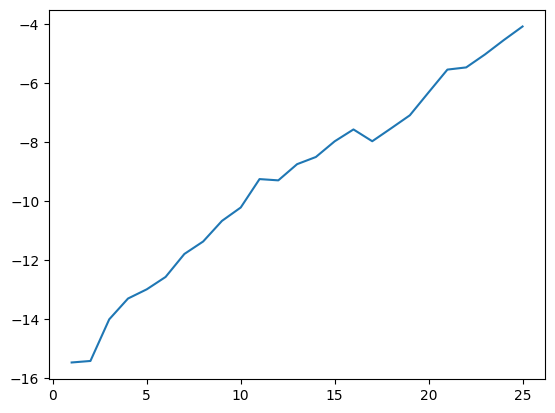

In [43]:
from matplotlib import pyplot as plt
import math
#3-B: fibonacci
def fibonacci_recursivo(n):
    if n == 0:
        return 0
    elif n == 1 or n == 2 :
        return 1
    else:
        return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)
    

def fibonacci_iterativo(n):
    if n == 0:
        return 0
    a = 0
    b = 1
    for h in range(n-1):
        c = a+b
        a = b
        b = c
    return c

timings_recursivo=[]
logaritmos =[]
eje_x=[]
n_rec=0
for i in range(25):
    n_rec += 1
    timings = %timeit -o -n 10 -r 5 -q fibonacci_recursivo(n_rec)
    timings_recursivo.append(timings.best)
    logaritmos.append(math.log(timings.best))
    eje_x.append(n_rec)
print(timings_recursivo)
#print(plt.plot(eje_x,timings_recursivo))
print(plt.plot(eje_x,logaritmos))

"""timings_iterativo=[]
n_it = 0
for j in range(10):
    n_it += 1
    timings = %timeit -o -n 10 -r 5 -q fibonacci_iterativo(n_it)
    timings_iterativo.append(timings.best)
#print(timings_iterativo)"""


In [10]:
import numpy as np
def insert_sort(t:np.array):
    for i in range(1,len(t)):
        a1=t[i]
        a3=t[i-1]
        for e in range(i):
            if a1<a3:
            
                t[i-e]=a3
                t[i-e-1]=a1

                a3=t[i-e-2]
            else:
                break
    return t
a=np.array([2,1])
insert_sort(a)
            
        

array([1, 2])